In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import scipy
import importlib
import os, sys
import seaborn as sns
import tqdm
# from pandas_datareader import data
import networkx as nx
sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')

import graph_fun as gf
import importlib
importlib.reload(sys.modules['graph_fun'])

from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
from rpy2.robjects import pandas2ri
rpy2.robjects.numpy2ri.activate()

Unable to determine R library path: Command '('C:\\PROGRA~1\\R\\R-41~1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


Define function

# Read Data

<AxesSubplot:xlabel='date'>

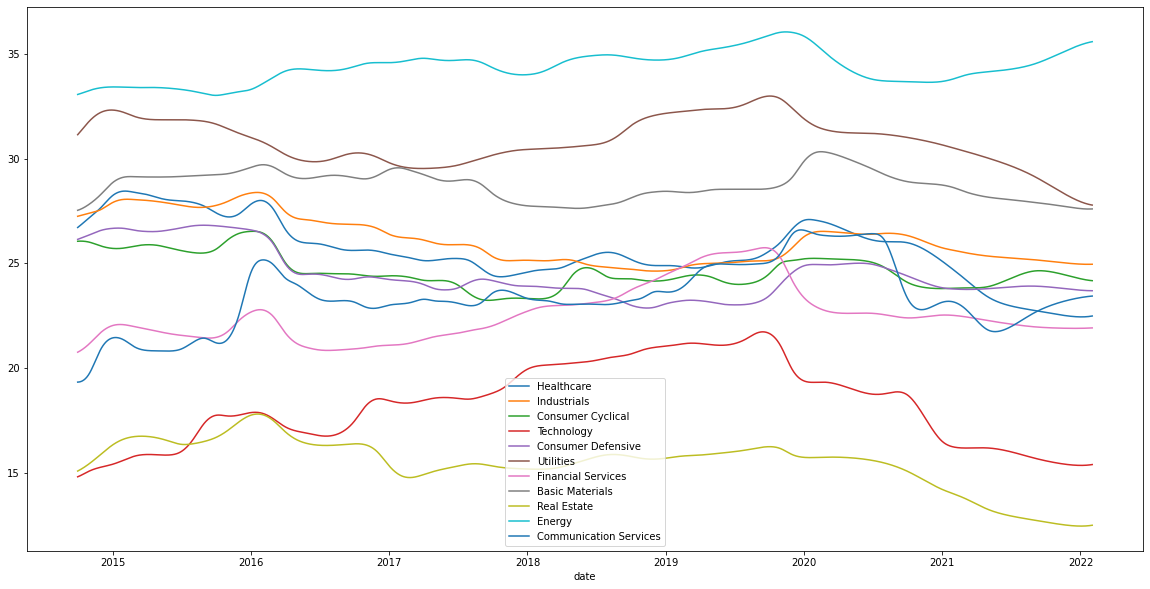

In [2]:
sector_gp = pd.read_pickle('../Yahoo/sector_gp.pkl')
sector_gp.plot(figsize = (20,10))

# Correlation

In [3]:
corr, prec = gf.rolling_correlation(sector_gp, 125, 5, "kendall")
dates = sector_gp.index[125::5]
dates = dates[:len(corr)]

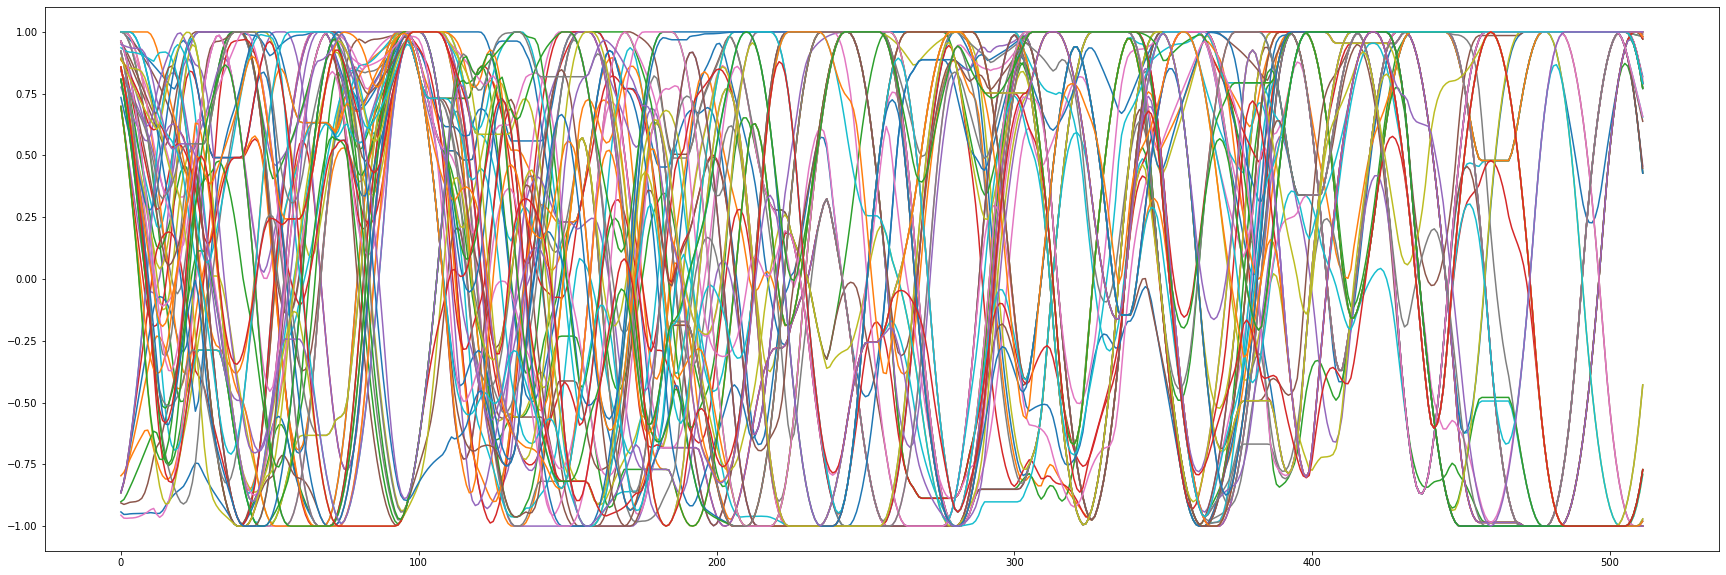

In [4]:
gf.plot_corr(corr)

In [5]:
importlib.reload(sys.modules['graph_fun'])
Gs_esg_full_w, Gs_esg_full, Gs_esg_full_signed = gf.gen_fullyconnected_threshold(corr, edge_type = None)
Gs_esg_full_w_pos, Gs_esg_full_pos, Gs_esg_full_signed_pos = gf.gen_fullyconnected_threshold(corr, edge_type = 'pos')
Gs_esg_full_w_neg, Gs_esg_full_neg, Gs_esg_full_signed_neg = gf.gen_fullyconnected_threshold(corr, edge_type = 'neg')

100%|██████████| 512/512 [00:08<00:00, 62.95it/s] 


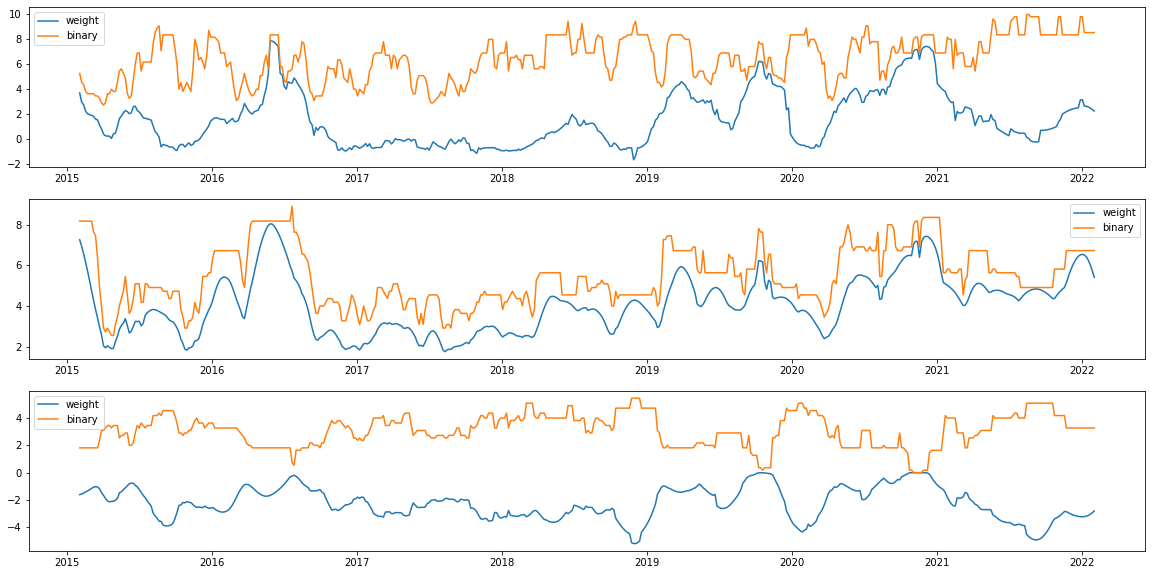

In [67]:
fig ,ax = plt.subplots(3,1, figsize = (20,10))

ax[0].plot(dates, gf.avg_degree_list(Gs_esg_full_w,  weight = 'weight'), label = 'weight')
ax[0].plot(dates,gf.avg_degree_list(Gs_esg_full), label = 'binary')
ax[0].legend()

ax[1].plot(dates,gf.avg_degree_list(Gs_esg_full_w_pos,  weight = 'weight'), label = 'weight')
ax[1].plot(dates,gf.avg_degree_list(Gs_esg_full_pos), label = 'binary')
ax[1].legend()

ax[2].plot(dates,gf.avg_degree_list(Gs_esg_full_w_neg,  weight = 'weight'), label = 'weight')
ax[2].plot(dates,gf.avg_degree_list(Gs_esg_full_neg), label = 'binary')
ax[2].legend()

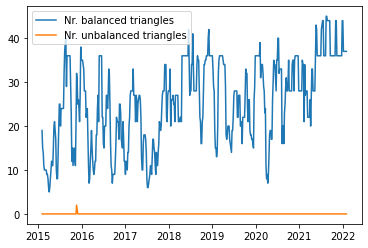

In [70]:
importlib.reload(sys.modules['graph_fun'])
balanced = [gf.cnt_balance(Gs_esg_full_signed[i])[0] for i in range(len(Gs_esg_full_signed))]
unbalanced = [gf.cnt_balance(Gs_esg_full_signed[i])[1] for i in range(len(Gs_esg_full_signed))]
plt.plot(dates, balanced, label = 'Nr. balanced triangles')
plt.plot(dates, unbalanced, label = 'Nr. unbalanced triangles')
plt.legend()

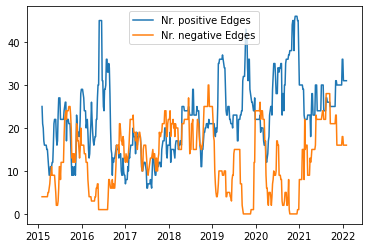

In [71]:
nr_pos = [gf.cnt_pos_neg(G, pos = 1) for G in Gs_esg_full_signed]
nr_neg = [gf.cnt_pos_neg(G, pos = -1) for G in Gs_esg_full_signed]
plt.plot(dates, nr_pos, label = 'Nr. positive Edges')
plt.plot(dates, nr_neg, label = 'Nr. negative Edges')
plt.legend()

AttributeError: 'Graph' object has no attribute 'node'

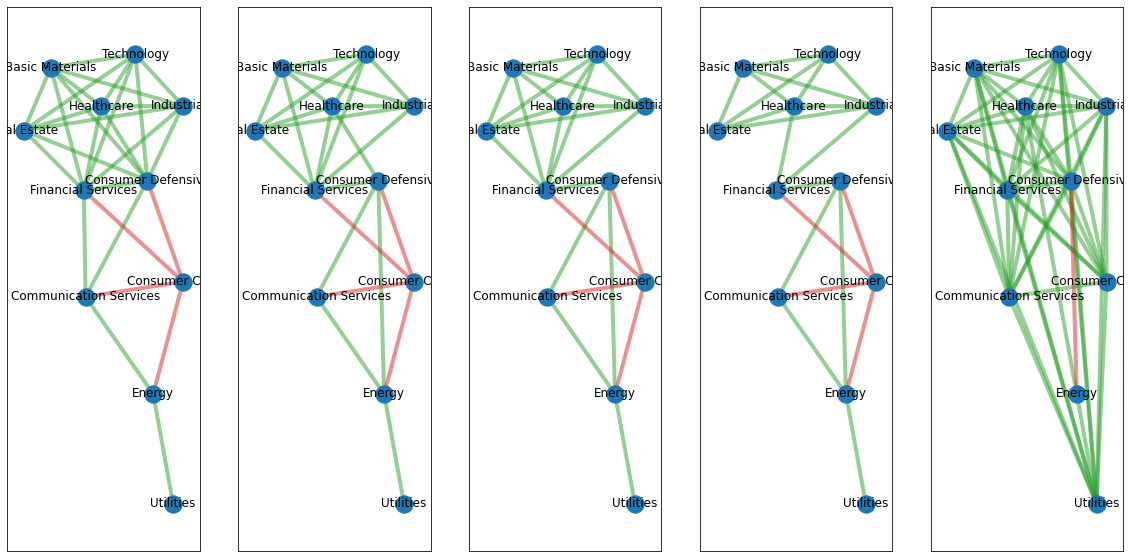

In [25]:
importlib.reload(sys.modules['graph_fun'])
gf.plot_sign_network(Gs_esg_full_signed, [0, 1, 2, 3, 100], {i: sector for i, sector in enumerate(sector_gp.columns)}, (20,10))

In [ ]:

plt.plot(range(len(fully_connected_graphs)), ok)
import pickle
with open('../data/ESG_Graphs/Threshold/corr.pkl', 'wb') as handle:
    pickle.dump({'graphs':fully_connected_graphs, 'dates':dates}, handle)

with open('../data/ESG_Graphs/Threshold/sign.pkl', 'wb') as handle:
    pickle.dump({'graphs':fully_connected_graphs_signed, 'dates':dates}, handle)

# Price Return and weighted ESG price return

Look at Corelation structures of $\log (r_t)$ and $\log (r_t)/ESG_t$.

In [39]:
# Read 
readRDS = ro.r['readRDS']
lgmrf_return = readRDS('../data/FinancialGraphs/SpectralHeavy/sector_price_change.rds')
lgmrf_return = dict(zip(lgmrf_return.names, map(list,list(lgmrf_return))))
lgmrf_return['dates'] = [pd.to_datetime((lgmrf_return['dates'][i]))[0] for i in range(len(lgmrf_return['dates']))]

lgmrf_esg_return = readRDS('../data/FinancialGraphs/SpectralHeavy/sector_esg_price_change.rds')
lgmrf_esg_return = dict(zip(lgmrf_esg_return.names, map(list,list(lgmrf_esg_return))))
lgmrf_esg_return['dates'] = [pd.to_datetime((lgmrf_esg_return['dates'][i]))[0] for i in range(len(lgmrf_esg_return['dates']))]


Gs_Lgmrf_return = [nx.from_numpy_matrix(A) for A in lgmrf_return['graphs']]
Gs_Lgmrf_esg_return = [nx.from_numpy_matrix(A) for A in lgmrf_esg_return['graphs']]
dates = lgmrf_esg_return['dates']

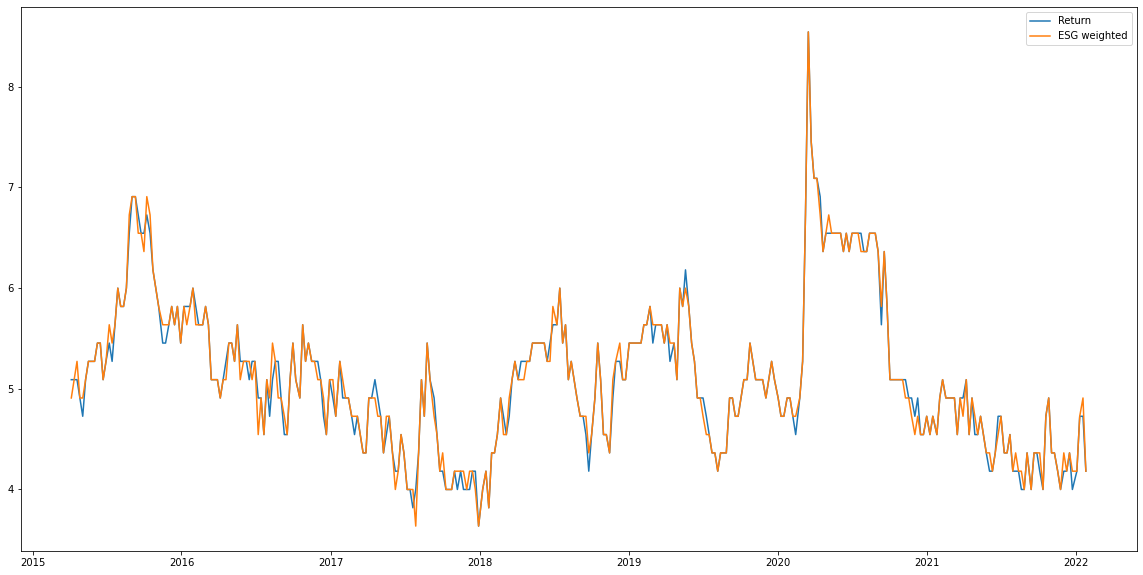

In [42]:
fig ,ax = plt.subplots(1,1, figsize = (20,10))

ax.plot(dates, gf.avg_degree_list(Gs_Lgmrf_return), label = 'Return')
ax.plot(dates,gf.avg_degree_list(Gs_Lgmrf_esg_return), label = 'ESG weighted')
ax.legend()


In [51]:
Gs_Lgmrf_return[0].edges(data = 'weight')

EdgeDataView([(0, 1, 0.14866311913098743), (0, 2, 0.3635441000451467), (0, 7, 0.272088650095008), (0, 8, 0.11332421036535614), (0, 10, 0.10244089400656785), (1, 2, 0.2688324131171281), (1, 4, 0.1360538531454315), (1, 6, 0.0015673654838404293), (1, 7, 0.15866208373808938), (1, 8, 0.035242535517685976), (1, 9, 0.25096117256346473), (2, 3, 0.1590559766099238), (2, 4, 0.10168923741567822), (2, 7, 0.08063650360556392), (2, 8, 0.026228646404408175), (3, 4, 0.01849003634628659), (3, 5, 0.785243915909639), (3, 7, 0.03714991247107687), (4, 6, 0.34233692830607265), (4, 7, 0.26952923322841343), (4, 9, 0.13192560232712164), (5, 7, 0.03731776466490387), (5, 9, 0.02347405618034281), (5, 10, 0.1540266512751316), (6, 9, 0.5934897548550703), (6, 10, 0.06272984538712985), (7, 8, 0.14456816418734708), (8, 10, 0.6806418196552118)])

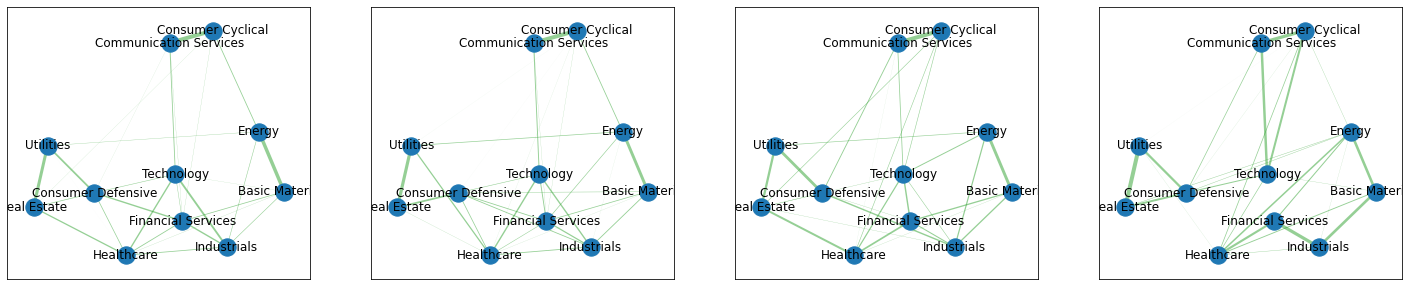

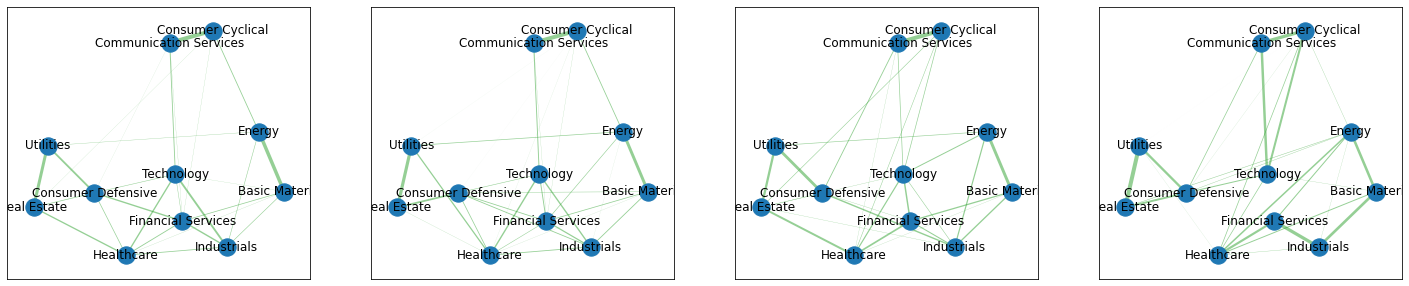

In [67]:
importlib.reload(sys.modules['graph_fun'])
pos = nx.spring_layout(Gs_Lgmrf_return[0])
gf.plot_sign_network(Gs_Lgmrf_return, [0, 10, 50, 100], {i: sector for i, sector in enumerate(lgmrf_return['stock_order'])}, (25,5), edge_name = 'weight', pos = pos)
gf.plot_sign_network(Gs_Lgmrf_esg_return, [0, 10, 50, 100], {i: sector for i, sector in enumerate(lgmrf_return['stock_order'])}, (25,5), edge_name = 'weight',pos = pos)

In [77]:

for u,v in list(Gs_Lgmrf_return[0].edges()):
    Gs_Lgmrf_return[0].edges[u][v]['ok'] = 3

TypeError: cannot unpack non-iterable int object

In [75]:
Gs_Lgmrf_return[0].edges(data = 'ok')

EdgeDataView([(0, 1, None), (0, 2, None), (0, 7, None), (0, 8, None), (0, 10, None), (1, 2, None), (1, 4, None), (1, 6, None), (1, 7, None), (1, 8, None), (1, 9, None), (2, 3, None), (2, 4, None), (2, 7, None), (2, 8, None), (3, 4, None), (3, 5, None), (3, 7, None), (4, 6, None), (4, 7, None), (4, 9, None), (5, 7, None), (5, 9, None), (5, 10, None), (6, 9, None), (6, 10, None), (7, 8, None), (8, 10, None)])